# Advertisement Click Prediction

In [78]:
### Importing All Libraries and Metrics

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [80]:
df=pd.read_csv('Social_Network_Ads.csv')

In [81]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [83]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

# Exploratory Data Analysis and Data Visualization:
Performing EDA on data can give meaning insights, discover patterns, detect outliers and can make assumptions with help of graphical representations.

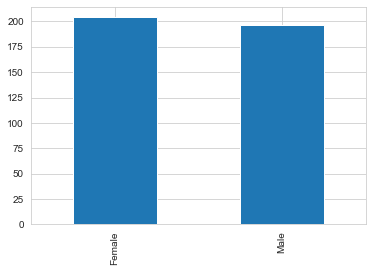

In [84]:
## Plotting different features

def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")
bar_graph('Gender')

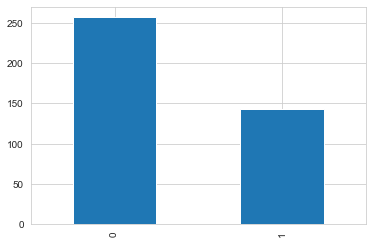

In [85]:
bar_graph('Purchased')

<AxesSubplot:xlabel='Purchased', ylabel='count'>

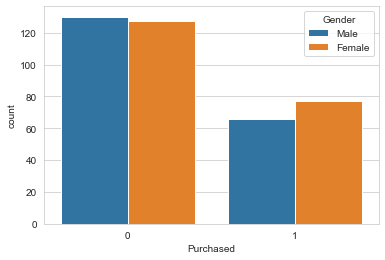

In [86]:
sns.countplot(data=df,x='Purchased',hue='Gender')

<AxesSubplot:xlabel='Age', ylabel='Count'>

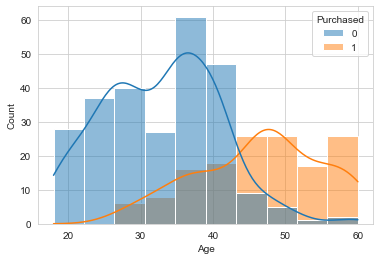

In [87]:
sns.histplot(data = df, x = "Age", kde = True, hue= 'Purchased')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

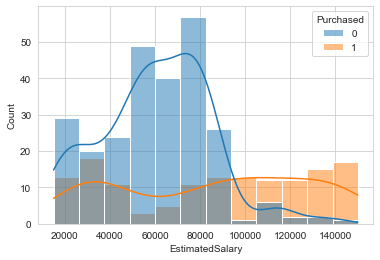

In [88]:
sns.histplot(data = df, x = "EstimatedSalary", kde = True, hue= 'Purchased')

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

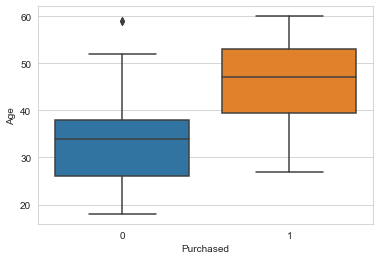

In [89]:
sns.set_style("whitegrid")
sns.boxplot(x = 'Purchased', y = 'Age', data = df)

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

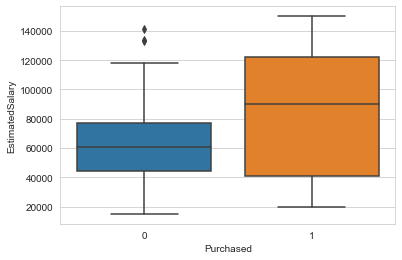

In [90]:
sns.set_style("whitegrid")
sns.boxplot(x = 'Purchased', y = 'EstimatedSalary', data = df)

### Correlation of Features

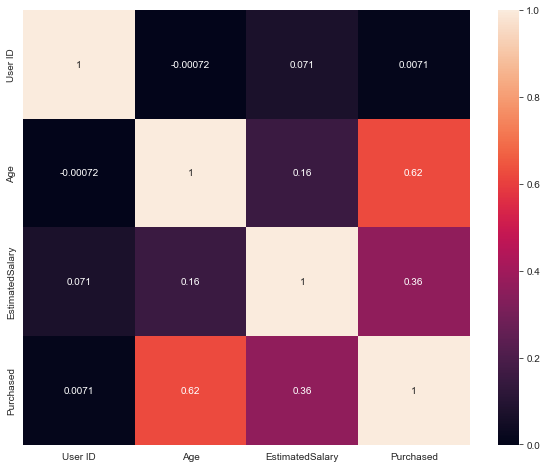

In [91]:
train_data = df[[col for col in df if df[col].nunique() > 1]]

corr = train_data.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr, annot=True)

plt.show()

### Feature Mapping for Categorical features

In [92]:
gmap = {'Male':0,'Female':1}
df['Gender'] = df['Gender'].map(gmap)

In [93]:
df['Gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: Gender, dtype: int64

### Model Building

The models used are:

- **XgBoost Classifier Algorithm**
- **Random Forest Classifier**
- **Gradient Boosting Algorithm**
- **MLP Classifier Algorithm**

In [94]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [95]:
scale = MinMaxScaler()
X = scale.fit_transform(X)

In [96]:
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)
X_train.shape, X_test.shape

((300, 4), (100, 4))

In [97]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [98]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [99]:
models=[]
models.append(('XGBoost Classifier', XGBClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Gradient Boosting',GradientBoostingClassifier()))
models.append(('Multi-Layer Perceptron',MLPClassifier()))
model_accu = []
model_name=[]


In [100]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    model_name.append(name)
    model_accu.append(accuracy_score(predictions,y_test))
    print(confusion_matrix(predictions,y_test))
    print('\n')
    print(accuracy_score(predictions,y_test))
    print('\n')

C:\Users\Snega\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoost Classifier
[14:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[57  3]
 [ 5 35]]


0.92


RandomForest
[[55  3]
 [ 7 35]]


0.9


Gradient Boosting
[[55  3]
 [ 7 35]]


0.9


Multi-Layer Perceptron
[[60 11]
 [ 2 27]]


0.87




C:\Users\Snega\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Comparing accuracies of all models used

In [101]:
model_comp=pd.DataFrame({'Models':model_name, 'Accuracies':model_accu})

In [102]:
model_comp

,Models,Accuracies
0,XGBoost Classifier,0.92
1,RandomForest,0.90
2,Gradient Boosting,0.90
3,Multi-Layer Perceptron,0.87


<AxesSubplot:xlabel='Models'>

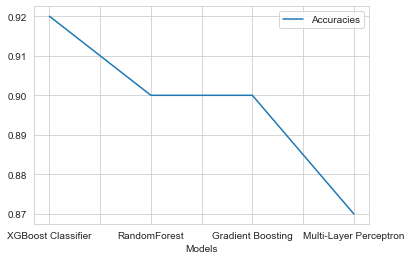

In [103]:
model_comp.plot(x='Models',y='Accuracies')